## Rasterio

#### Reading raster files with Rasterio

In [ ]:
import rasterio


fp = "o41078a5.tif"
raster = rasterio.open(fp)

# Check type of the variable 'raster'
type(raster)


rasterio.io.DatasetReader

#### Read raster file properties

In [20]:
# Projection
print(raster.crs)


EPSG:32617


In [12]:

# Affine transform (how raster is scaled, rotated, skewed, and/or translated)
raster.transform


Affine(2.4384, 0.0, 698753.304798,
       0.0, -2.4384, 4556059.506392)

In [15]:

# Dimensions
print("width : ",raster.width)
print("height: ",raster.height)

width :  4992
height:  6763


In [14]:
# Number of bands
raster.count

1

In [16]:
# Bounds of the file
raster.bounds

BoundingBox(left=698753.304798, bottom=4539568.607192, right=710925.797598, top=4556059.506392)

In [17]:
# Driver (data format)
raster.driver

'GTiff'

In [18]:
# No data values for all channels
raster.nodatavals

(None,)

In [19]:
# All Metadata for the whole raster dataset
raster.meta

{'driver': 'GTiff',
 'dtype': 'uint8',
 'nodata': None,
 'width': 4992,
 'height': 6763,
 'count': 1,
 'crs': CRS.from_wkt('PROJCS["WGS 84 / UTM zone 17N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-81],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32617"]]'),
 'transform': Affine(2.4384, 0.0, 698753.304798,
        0.0, -2.4384, 4556059.506392)}

In [34]:
# Read the raster band as separate variable
band1 = raster.read(1)

# Check type of the variable 'band'
type(band1)
print(band1)

[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]


In [22]:
# Data type of the values
band1.dtype

dtype('uint8')

### Band statistics

In [25]:
import numpy as np

# Read all bands
array = raster.read()

# Calculate statistics for each band
stats = []

for band in array:
    stats.append({
          'min': band.min(),
          'mean': band.mean(),
          'median': np.median(band),
          'max': band.max()}
          )


print(stats)

[{'min': np.uint8(0), 'mean': np.float64(3.5808772077613105), 'median': np.float64(5.0), 'max': np.uint8(12)}]


## Visualizing raster layers
#### Basic plotting
rasterio.plot.show() function of rasterio to visualise the Rastor data

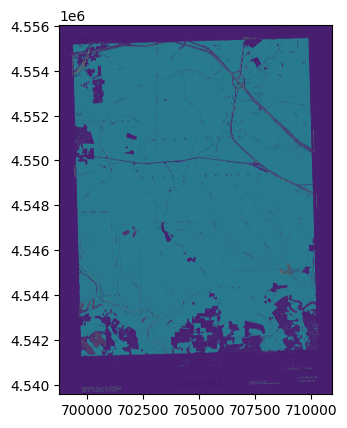

<Axes: >

In [26]:
import rasterio
from rasterio.plot import show

fp = "o41078a5.tif"

# Open the file:
raster = rasterio.open(fp)

show(raster)


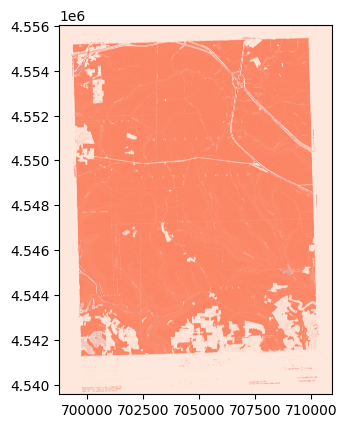

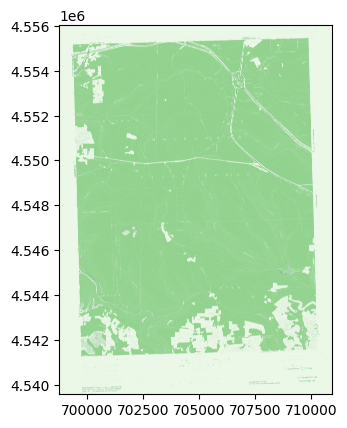

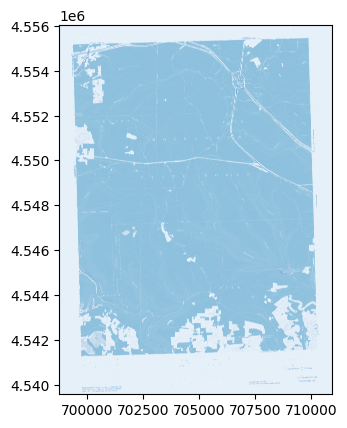

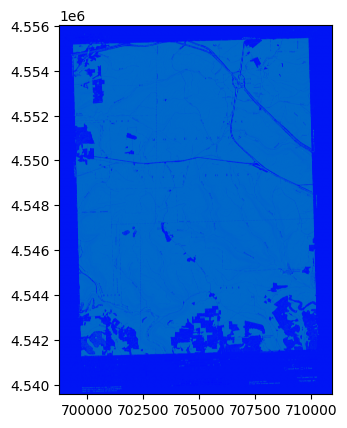

<Axes: >

In [32]:
show((raster, 1), cmap='Reds')

show((raster,1), cmap='Greens')

show((raster, 1), cmap='Blues')

show((raster, 1), cmap='winter')

## Histogram of the raster data

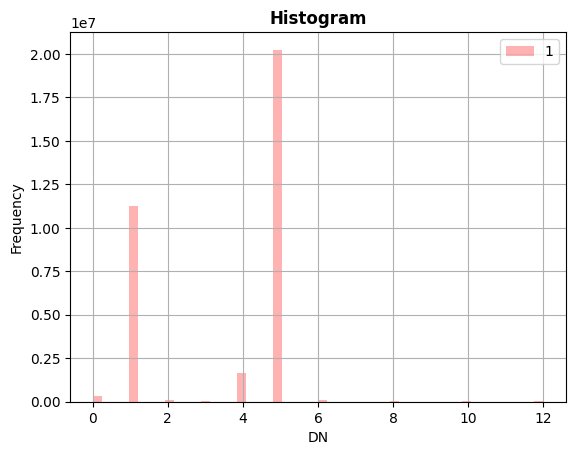

In [33]:
from rasterio.plot import show_hist
show_hist(raster, bins=50, lw=0.0, stacked=False, alpha=0.3,histtype='stepfilled', title="Histogram")